# Packages

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image

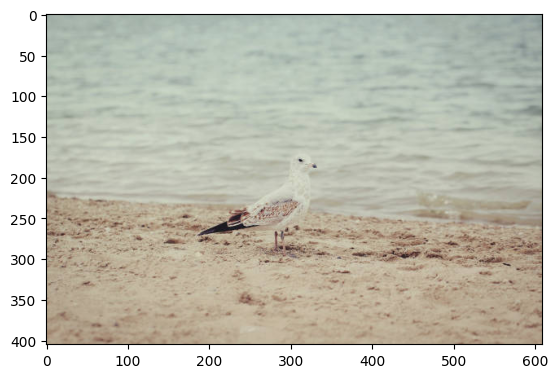

In [2]:
img = cv2.cvtColor(cv2.imread('images/low_contrast.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

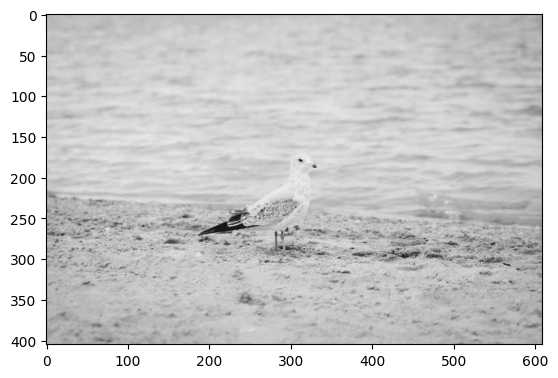

In [3]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.show()

In [4]:
def plotHist(img, ax = None):
    hist = np.zeros(256)

    for value in img.flatten():
        hist[value] += 1

    if ax == None:
        plt.bar(range(0,256), hist, color = 'gray', edgecolor = 'gray')
        plt.xlim([0, 255])
        plt.ylabel('No. of pixels', size = 12)
        plt.xlabel('Pixel Values', size = 12)
        plt.show()
    else:
        ax.bar(range(0,256), hist, color = 'gray', edgecolor = 'gray')
        ax.set_xlim([0, 255])
        ax.yaxis.set_major_formatter(lambda x, pos: '0' if x == 0 else str(x/1000) + '$\,k$')
        ax.set_ylabel('No. of pixels', size = 12)
        ax.set_xlabel('Pixel Values', size = 12)
        # ax.show()

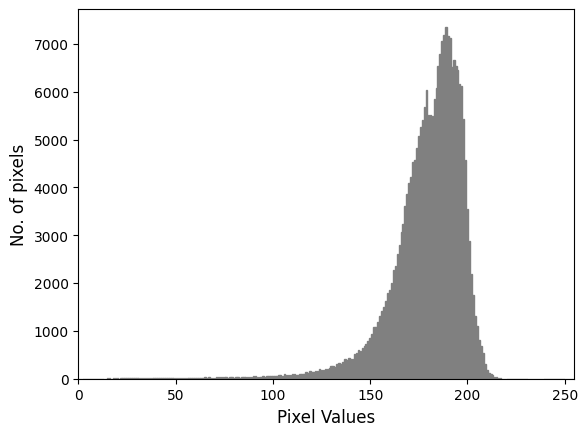

In [5]:
plotHist(img_gray)

# 2. Linear Transformation

- Equation
$$ g = \frac{g_{\text{max}} - g_{\text{min}}} {{f_{\text{max}} - f_{\text{min}}}}(f - f_{\text{min}}) + g_{\text{min}} $$


- Intensity Range of Original Image :
$$ [f_{\text{min}}, f_{\text{max}}] $$

- Intensity Range of the New Image:
$$ [g_{\text{min}}, g_{\text{max}}] $$

In [6]:
def linearTransf(img, gmax, gmin):

    fmin = np.min(img)
    fmax = np.max(img)

    img_transf = np.full_like(img, 0)

    for idx, x in np.ndenumerate(img):

        g = ((gmax - gmin) / (fmax - fmin)) * (x - fmin) + gmin

        img_transf[idx[0], idx[1]] = g

    return img_transf

In [7]:
linearTransformation = linearTransf(img_gray, 0, 255)

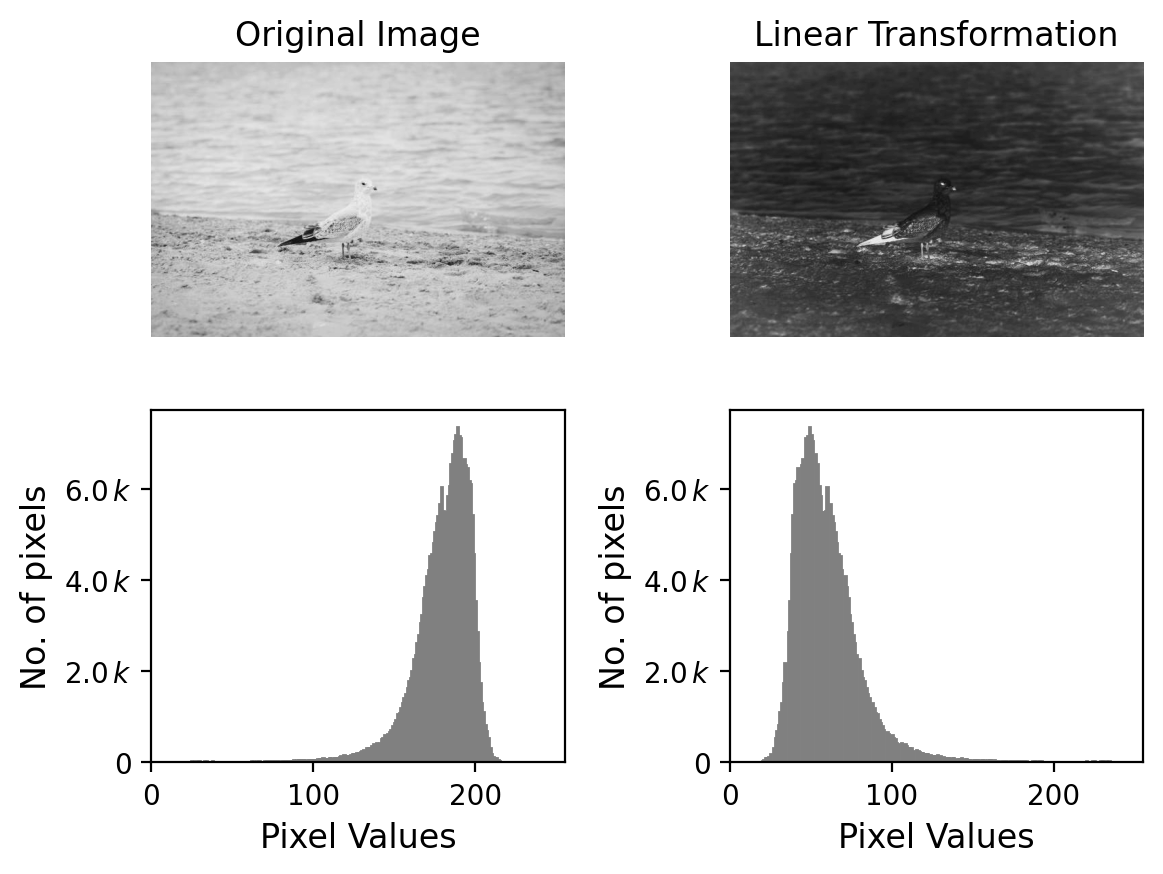

In [8]:
fig, ax = plt.subplots(2, 2, dpi = 200)

plt.subplots_adjust(wspace = 0.4, hspace = 0.1)

ax[0, 0].imshow(img_gray, cmap='gray')
ax[0, 0].axis("off")
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(linearTransformation, cmap='gray')
ax[0, 1].axis("off")
ax[0, 1].set_title('Linear Transformation')

plotHist(img_gray, ax[1, 0])
plotHist(linearTransformation, ax[1, 1])

plt.show()

# 3. Nonlinear Contrast Transformations:
- Logarithm
- Square Root
- Exponential
- Square

## 3.1 Logarithm

In [9]:
def logTransf(img):

    img_transf = np.full_like(img, 0).astype(np.float64)

    img_linear = linearTransf(img, 255, 0)

    for idx, x in np.ndenumerate(img_linear):

        img_transf[idx[0], idx[1]] = np.log(1 + x)

    return linearTransf(img_transf, 255, 0).astype(np.uint8)

In [10]:
logTransformation = logTransf(img_gray)

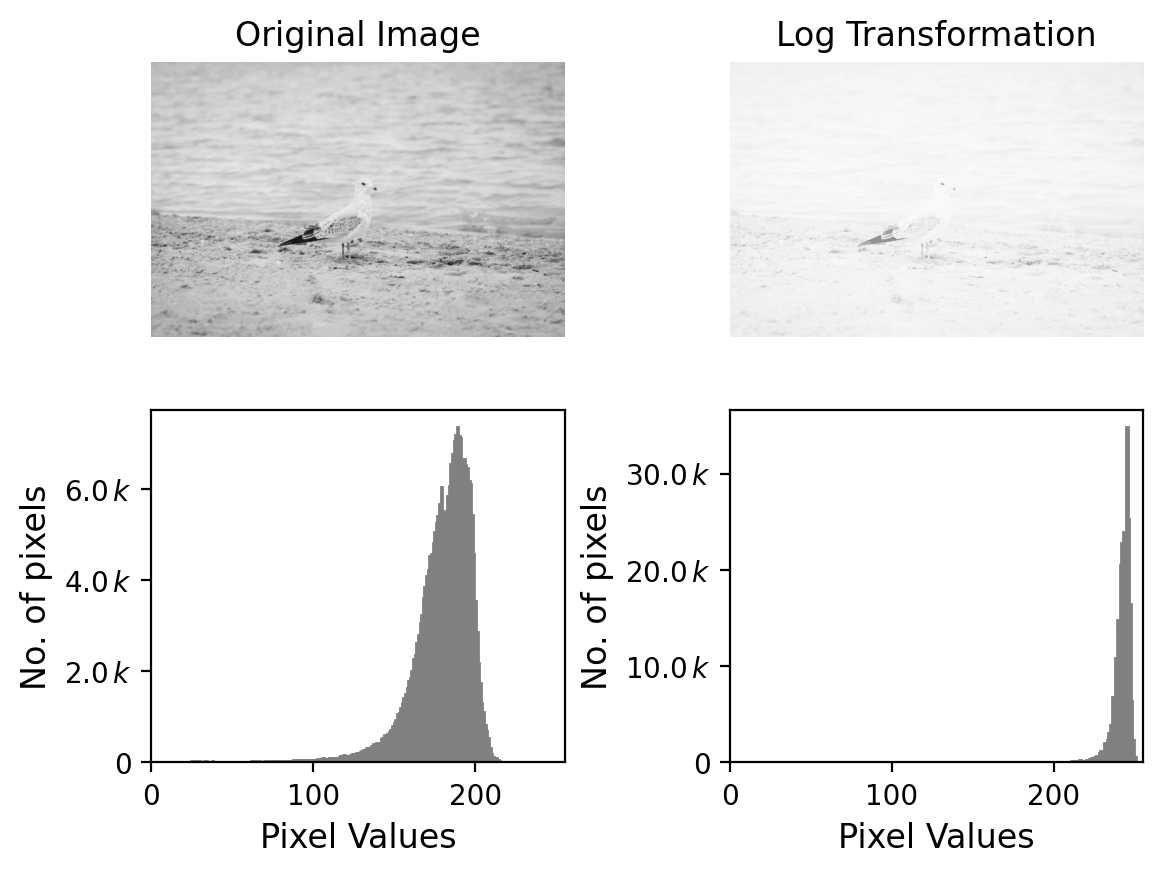

In [11]:
fig, ax = plt.subplots(2, 2, dpi = 200)

plt.subplots_adjust(wspace = 0.4, hspace = 0.1)

ax[0, 0].imshow(img_gray, cmap='gray')
ax[0, 0].axis("off")
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(logTransformation, cmap='gray')
ax[0, 1].axis("off")
ax[0, 1].set_title('Log Transformation')

plotHist(img_gray, ax[1, 0])
plotHist(logTransformation, ax[1, 1])

plt.show()

## 3.2 Square Root

In [12]:
def sqrtTransf(img):

    img_transf = np.full_like(img, 0).astype(np.float64)

    # img_linear = transf_linear(img, 255, 0)

    for idx, x in np.ndenumerate(img):

        img_transf[idx[0], idx[1]] = np.sqrt(x)

    return linearTransf(img_transf, 255, 0).astype(np.uint8)

In [13]:
sqrtTransformation = sqrtTransf(img_gray)

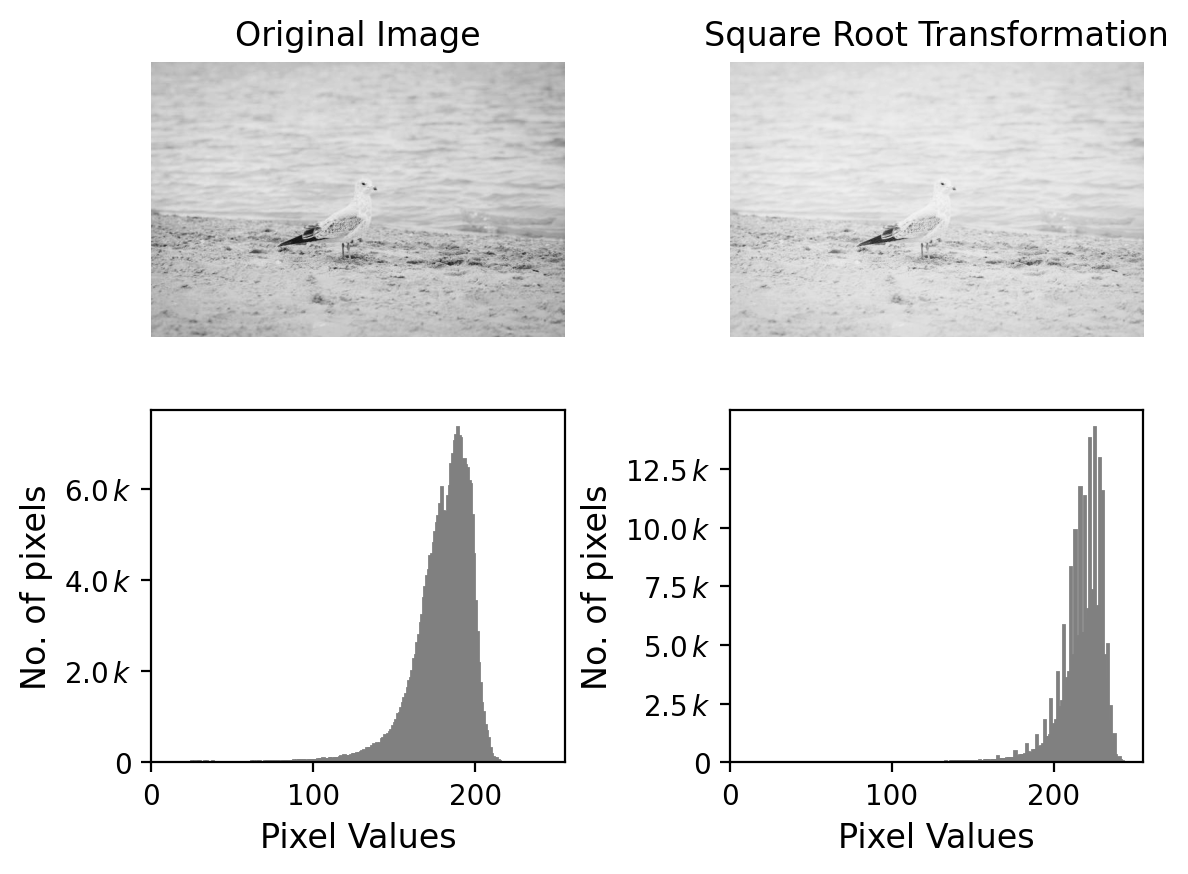

In [14]:
fig, ax = plt.subplots(2, 2, dpi = 200)

plt.subplots_adjust(wspace = 0.4, hspace = 0.1)

ax[0, 0].imshow(img_gray, cmap='gray')
ax[0, 0].axis("off")
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(sqrtTransformation, cmap='gray')
ax[0, 1].axis("off")
ax[0, 1].set_title('Square Root Transformation')

plotHist(img_gray, ax[1, 0])
plotHist(sqrtTransformation, ax[1, 1])

plt.show()

## 3.3 Exponential

In [15]:
def expTransf(img):

    img_transf = np.full_like(img, 0).astype(np.float64)

    img_linear = linearTransf(img, 255, 0)

    for idx, x in np.ndenumerate(img_linear):

        img_transf[idx[0], idx[1]] = np.exp(x / 50)

    return linearTransf(img_transf, 255, 0).astype(np.uint8)

In [16]:
expTransformation = expTransf(img_gray)

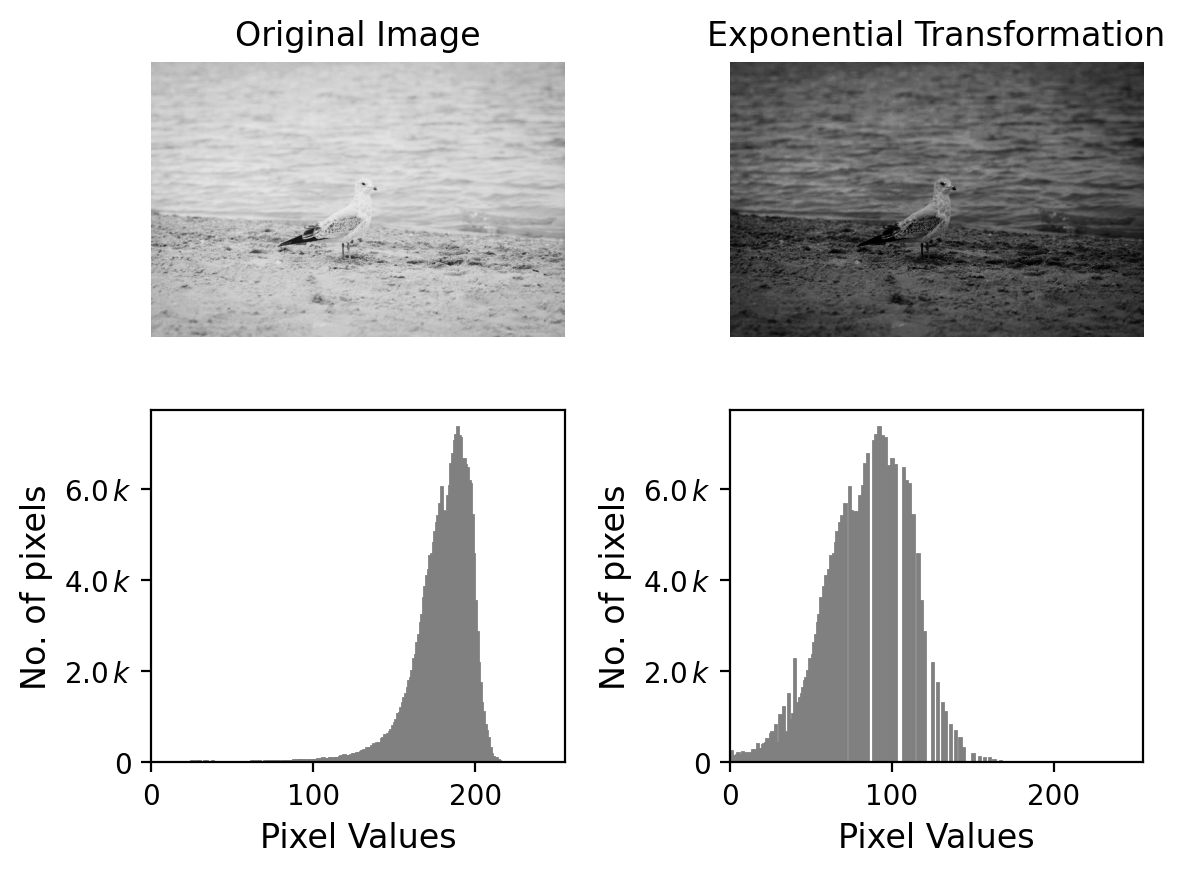

In [17]:
fig, ax = plt.subplots(2, 2, dpi = 200)

plt.subplots_adjust(wspace = 0.4, hspace = 0.1)

ax[0, 0].imshow(img_gray, cmap='gray')
ax[0, 0].axis("off")
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(expTransformation, cmap='gray')
ax[0, 1].axis("off")
ax[0, 1].set_title('Exponential Transformation')

plotHist(img_gray, ax[1, 0])
plotHist(expTransformation, ax[1, 1])

plt.show()

## 3.4 Square

In [18]:
def sqTransf(img):

    img_transf = np.full_like(img, 0).astype(np.float64)

    img_linear = linearTransf(img, 255, 0)

    for idx, x in np.ndenumerate(img_linear):

        img_transf[idx[0], idx[1]] = np.power(x, 2)

    return linearTransf(img_transf, 255, 0).astype(np.uint8)

In [19]:
sqTransformation = sqTransf(img_gray)

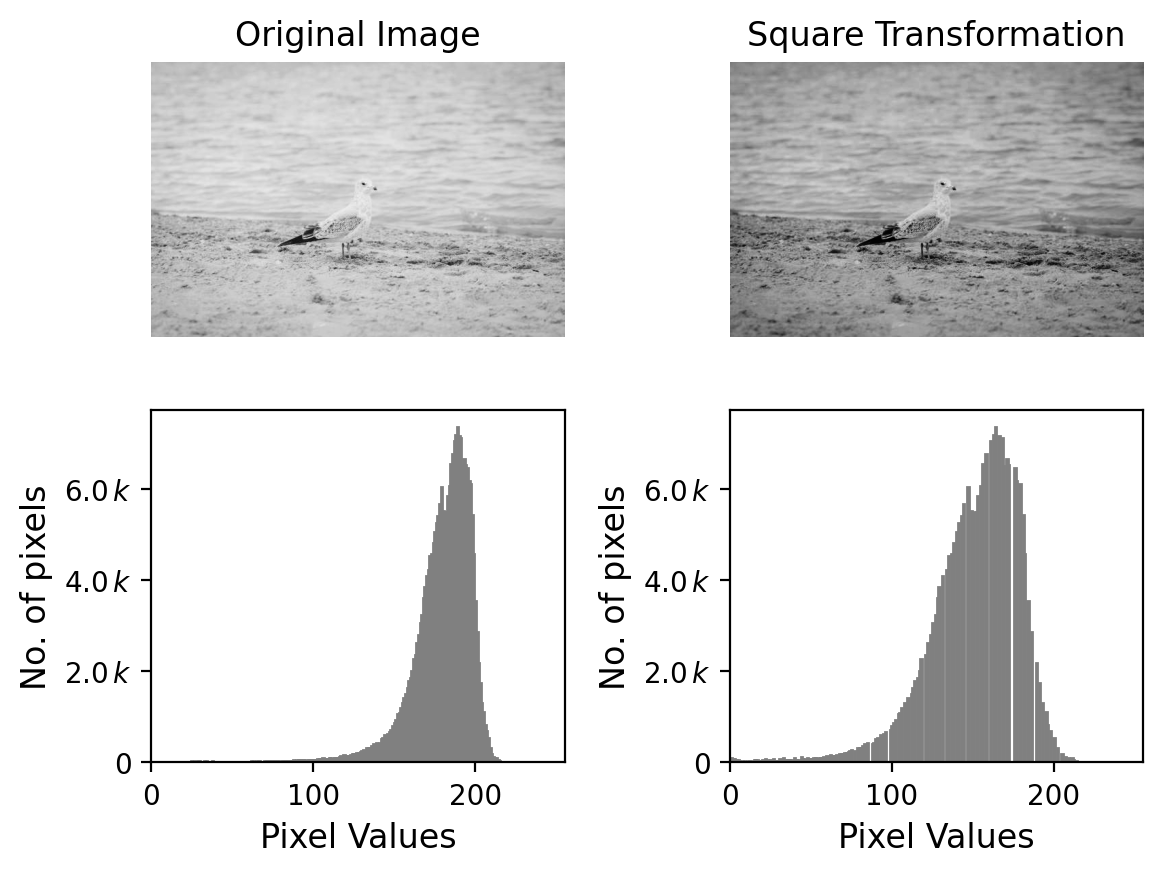

In [20]:
fig, ax = plt.subplots(2, 2, dpi = 200)

plt.subplots_adjust(wspace = 0.4, hspace = 0.1)

ax[0, 0].imshow(img_gray, cmap='gray')
ax[0, 0].axis("off")
ax[0, 0].set_title('Original Image')

ax[0, 1].imshow(sqTransformation, cmap='gray')
ax[0, 1].axis("off")
ax[0, 1].set_title('Square Transformation')

plotHist(img_gray, ax[1, 0])
plotHist(sqTransformation, ax[1, 1])

plt.show()